The following contains data from the Sloan Digital Sky Survey of NGC5585.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from astropy.io import fits

In [3]:
NGC5585 = fits.open('frame-u-003225-4-0057.fits')

In [4]:
NGC5585

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000025C9C4154F0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x0000025C9E87C460>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000025C9C4153D0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000025C9EEEE220>]

In [5]:
NGC5585.info()

Filename: frame-u-003225-4-0057.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      85   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   


In [6]:
NGC5585[0]

In [7]:
NGC5585[0].header

SIMPLE  =                    T /                                                
BITPIX  =                  -32 / 32 bit floating point                          
NAXIS   =                    2                                                  
NAXIS1  =                 2048                                                  
NAXIS2  =                 1489                                                  
EXTEND  =                    T /Extensions may be present                       
BZERO   =              0.00000 /Set by MRD_SCALE                                
BSCALE  =              1.00000 /Set by MRD_SCALE                                
TAI     =        4530315081.34 / 1st row - Number of seconds since Nov 17 1858  
RA      =            214.77558 / 1st row - Right ascension of telescope boresigh
DEC     =            56.369450 / 1st row - Declination of telescope boresight (d
SPA     =             115.472  / 1st row - Camera col position angle wrt north (
IPA     =             314.78

In [8]:
NGC5585[1].header

XTENSION= 'IMAGE   '           /Image Extension created by MWRFITS v1.11        
BITPIX  =                  -32 /                                                
NAXIS   =                    1 /                                                
NAXIS1  =                 2048 /                                                
PCOUNT  =                    0 /                                                
GCOUNT  =                    1 /                                                

In [9]:
data = NGC5585[0].data

In [10]:
type(data)

numpy.ndarray

In [11]:
data.shape

(1489, 2048)

In [12]:
data.dtype.name

'float32'

In [13]:
print ('Min', np.min(data))
print ('Max', np.max(data))
print ('Mean', np.mean(data))
print ('SD', np.std(data))

Min -0.26416016
Max 494.0
Mean 0.011828335
SD 0.901345


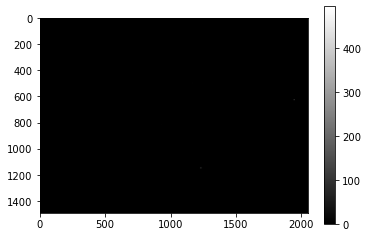

In [14]:
plt.imshow(data, cmap='gray')
plt.colorbar()

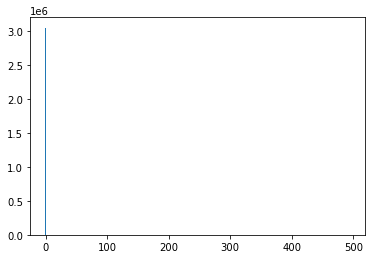

In [15]:
histrogram = plt.hist(data.flat, bins=500)

[Text(1, 5000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

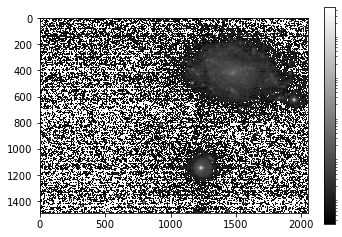

In [16]:
from matplotlib.colors import LogNorm

plt.imshow(data, cmap='gray', norm=LogNorm())
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

In [17]:
from astropy.visualization import make_lupton_rgb

In [18]:
NGC5585u = fits.open('frame-u-003225-4-0057.fits')
NGC5585g = fits.open('frame-g-003225-4-0057.fits')
NGC5585r = fits.open('frame-r-003225-4-0057.fits')
NGC5585i = fits.open('frame-i-003225-4-0057.fits')

In [19]:
g=NGC5585g[0].data
r=NGC5585r[0].data
u=NGC5585u[0].data
i=NGC5585i[0].data

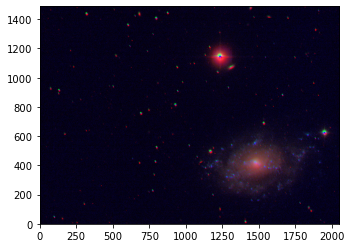

In [20]:
rgb_default = make_lupton_rgb(i*0.3,g*0.3,u,stretch=0.2,Q=6)

plt.imshow(rgb_default, origin='lower')
plt.savefig('iguNGC5585.jpg')

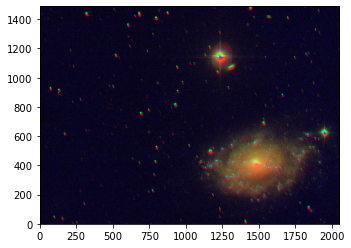

In [21]:
rgb_default = make_lupton_rgb(r,g,u*1.35,stretch=0.2,Q=6)

plt.imshow(rgb_default, origin='lower')
plt.savefig('rguNGC5585.jpg')

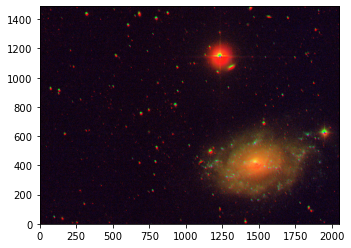

In [22]:
rgb_default = make_lupton_rgb(i,g,u,stretch=0.2,Q=6)

plt.imshow(rgb_default, origin='lower')
plt.savefig('rguNGC5585-1.jpg')

## Understanding the astropy.visualisation.make_lupton_rgb function

The function is used to create an 8-bit rgb image using data from three different filters.

-The first three parameters are for the red, green, blue ranges of colours in the final output. It accepts a numpy.ndarray for each of r, g, b arguments.  

-If any one colour have high intensity, python gives the facility to simply divide/multiply the array by a constant. This **scales** the output of that colour. For example, in M16 observations of the Hubble Space telescope, the 657nm intensity is much higher than others. As a result, it must be scaled down by factor of 1/7 for better result. 

-Next is actually a minimum argument, which we do not use here, and is used to set a threshold for intensity to be plotted. This can be useful to **get rid of noise** in the image which is generally of lower intensity. It's default value is 0. 

-The stretch value (default=5) is used to specify linear stretch of the image. It is dampen the intensity of the signal by a factor equal to it's value. This also allows us to amplify the signal intensity for better viewing. It increases the **brightness** of the image.

-The Q value (default=8) is the asinh softening parameter. It has roughly an inverse relationship with the **contrast** of the signal intensities in output.

-Finally, a filename parameter can accept a string to the file in the project folder where the image output can be overwritten.